In [8]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
from scipy import stats
#import cf_units as cf
# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [9]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs/atmospheric'

In [10]:
fsdsvi_ssp_orig = xr.open_dataset(savedir + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.clm2.h0.RAIN.201501-206912.nc')
fsdsvi_ssp_orig = fsdsvi_ssp_orig.RAIN
fsdsvi_sai_orig = xr.open_dataset(savedir + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.clm2.h0.RAIN.203501-206912.nc')
fsdsvi_sai_orig = fsdsvi_sai_orig.RAIN

In [11]:
fsdsvi_ssp = fsdsvi_ssp_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_ssp = fsdsvi_ssp.resample(time='1A').mean(dim='time')
fsdsvi_ssp = fsdsvi_ssp.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp_control = fsdsvi_ssp_orig.sel(time=slice('2016-02-01', '2025-01-01'))
fsdsvi_ssp_control = fsdsvi_ssp_control.resample(time='1A').mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.sel(time=slice('2016-02-01', '2025-01-01'))

fsdsvi_sai = fsdsvi_sai_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_sai = fsdsvi_sai.resample(time='1A').mean(dim='time')
fsdsvi_sai = fsdsvi_sai.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp = fsdsvi_ssp.mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.mean(dim='time')
fsdsvi_sai = fsdsvi_sai.mean(dim='time')

dif_rain = (fsdsvi_sai - fsdsvi_ssp) / (fsdsvi_ssp)
dif_rain = (dif_rain) * (100)

dif_rain_control = (fsdsvi_ssp - fsdsvi_ssp_control) / (fsdsvi_ssp_control)
dif_rain_control = (dif_rain_control) * (100)

In [12]:
fsdsvi_ssp_orig = xr.open_dataset(savedir + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.clm2.h0.FSDS.201501-206912.nc')
fsdsvi_ssp_orig = fsdsvi_ssp_orig.FSDS
fsdsvi_sai_orig = xr.open_dataset(savedir + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.clm2.h0.FSDS.203501-206912.nc')
fsdsvi_sai_orig = fsdsvi_sai_orig.FSDS

In [13]:
fsdsvi_ssp = fsdsvi_ssp_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_ssp = fsdsvi_ssp.resample(time='1A').mean(dim='time')
fsdsvi_ssp = fsdsvi_ssp.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp_control = fsdsvi_ssp_orig.sel(time=slice('2016-02-01', '2025-01-01'))
fsdsvi_ssp_control = fsdsvi_ssp_control.resample(time='1A').mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.sel(time=slice('2016-02-01', '2025-01-01'))

fsdsvi_sai = fsdsvi_sai_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_sai = fsdsvi_sai.resample(time='1A').mean(dim='time')
fsdsvi_sai = fsdsvi_sai.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp = fsdsvi_ssp.mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.mean(dim='time')
fsdsvi_sai = fsdsvi_sai.mean(dim='time')

dif_fsds = (fsdsvi_sai - fsdsvi_ssp) / (fsdsvi_ssp)
dif_fsds = (dif_fsds) * (100)

dif_fsds_control = (fsdsvi_ssp - fsdsvi_ssp_control) / (fsdsvi_ssp_control)
dif_fsds_control = (dif_fsds_control) * (100)

In [14]:
fsdsvi_ssp_orig = xr.open_dataset(savedir + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.clm2.h0.FSDSVI.201501-206912.nc')
fsdsvi_ssp_orig = fsdsvi_ssp_orig.FSDSVI
fsdsvi_sai_orig = xr.open_dataset(savedir + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.clm2.h0.FSDSVI.203501-206912.nc')
fsdsvi_sai_orig = fsdsvi_sai_orig.FSDSVI

In [15]:
fsdsvi_ssp = fsdsvi_ssp_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_ssp = fsdsvi_ssp.resample(time='1A').mean(dim='time')
fsdsvi_ssp = fsdsvi_ssp.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp_control = fsdsvi_ssp_orig.sel(time=slice('2016-02-01', '2025-01-01'))
fsdsvi_ssp_control = fsdsvi_ssp_control.resample(time='1A').mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.sel(time=slice('2016-02-01', '2025-01-01'))

fsdsvi_sai = fsdsvi_sai_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_sai = fsdsvi_sai.resample(time='1A').mean(dim='time')
fsdsvi_sai = fsdsvi_sai.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp = fsdsvi_ssp.mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.mean(dim='time')
fsdsvi_sai = fsdsvi_sai.mean(dim='time')

dif_fsdsvi= (fsdsvi_sai - fsdsvi_ssp) / (fsdsvi_ssp)
dif_fsdsvi = (dif_fsdsvi) * (100)

dif_fsdsvi_control = (fsdsvi_ssp - fsdsvi_ssp_control) / (fsdsvi_ssp_control)
dif_fsdsvi_control = (dif_fsdsvi_control) * (100)

In [16]:
fsdsvi_ssp_orig = xr.open_dataset(savedir + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.clm2.h0.TSA.201501-206912.nc')
fsdsvi_ssp_orig = fsdsvi_ssp_orig.TSA
fsdsvi_sai_orig = xr.open_dataset(savedir + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.clm2.h0.TSA.203501-206912.nc')
fsdsvi_sai_orig = fsdsvi_sai_orig.TSA

In [17]:
fsdsvi_ssp = fsdsvi_ssp_orig.sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_ssp = fsdsvi_ssp.resample(time='1A').mean(dim='time')
fsdsvi_ssp = fsdsvi_ssp.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp_control = fsdsvi_ssp_orig.sel(time=slice('2016-02-01', '2025-01-01'))
fsdsvi_ssp_control = fsdsvi_ssp_control.resample(time='1A').mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.sel(time=slice('2016-02-01', '2025-01-01'))

fsdsvi_sai = fsdsvi_sai_orig .sel(time=slice('2049-02-01', '2068-01-01'))
fsdsvi_sai = fsdsvi_sai.resample(time='1A').mean(dim='time')
fsdsvi_sai = fsdsvi_sai.sel(time=slice('2049-02-01', '2068-01-01'))

fsdsvi_ssp = fsdsvi_ssp.mean(dim='time')
fsdsvi_ssp_control = fsdsvi_ssp_control.mean(dim='time')
fsdsvi_sai = fsdsvi_sai.mean(dim='time')

dif_temp = (fsdsvi_sai - fsdsvi_ssp) / (fsdsvi_ssp)
dif_temp = (dif_temp) * (100)

dif_temp_control = (fsdsvi_ssp - fsdsvi_ssp_control) / (fsdsvi_ssp_control)
dif_temp_control = (dif_temp_control) * (100)

In [28]:
temp_levels = np.arange(-0.4, 0.5, 0.1)
temp_colors = ['#8c510a',
              '#bf812d',
              '#dfc27d',
              '#f6e8c3',
              '#f7f7f7',
              '#f7f7f7',
              '#c7eae5',
              '#80cdc1',
              '#35978f',
              '#01665e']

rain_levels = np.arange(-40, 50, 10)
rain_colors = ['#8c510a',
              '#bf812d',
              '#dfc27d',
              '#f6e8c3',
              '#f7f7f7',
              '#f7f7f7',
              '#c7eae5',
              '#80cdc1',
              '#35978f',
              '#01665e']

dif_levels = np.arange(-8, 10, 2)
dif_colors = ['#8c510a',
              '#bf812d',
              '#dfc27d',
              '#f6e8c3',
              '#f7f7f7',
              '#f7f7f7',
              '#c7eae5',
              '#80cdc1',
              '#35978f',
              '#01665e']

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecati

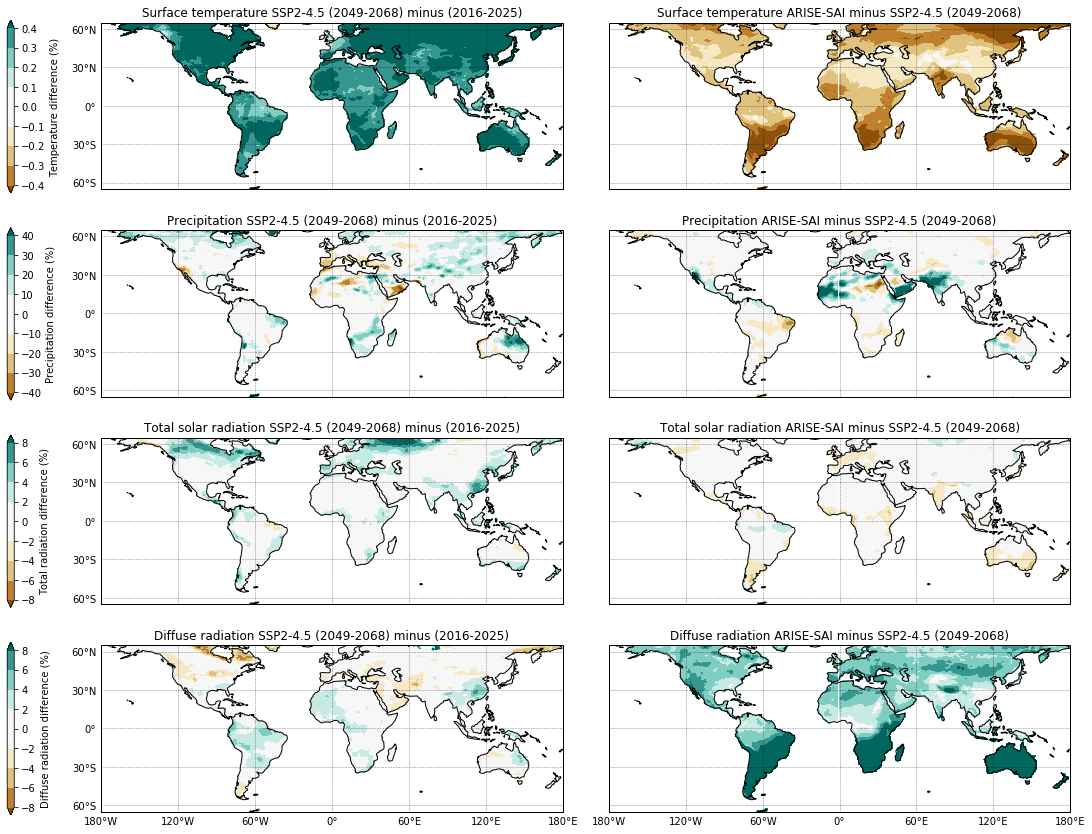

In [54]:
fig = plt.figure(figsize=(14,16))
ax1 = fig.add_subplot(4,2,1,projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(4,2,2,projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(4,2,3,projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(4,2,4,projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(4,2,5,projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(4,2,6,projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(4,2,7,projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(4,2,8,projection=ccrs.PlateCarree())

cb1 = dif_temp_control.plot.contourf(ax=ax1, colors=temp_colors, extend='both', levels=temp_levels, add_colorbar=False)
ax1.coastlines()
ax1.set_xlim(-180, 180)
ax1.set_ylim(-65, 65)
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl1.xlabels_top = False
gl1.xlabels_bottom = False
gl1.ylabels_left = True
gl1.ylabels_right=False
gl1.xlines = True
#gl1.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl1.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'color': 'black'}
gl1.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.84, 0.007, 0.15])
fig.colorbar(cb1, cax=cbar_ax, orientation='vertical', label="Temperature difference (%)")
#ax1.contourf(pval_clm_2050.lon.values, pval_clm_2050.lat.values, pval_clm_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
#pval_clm_2050.where(pval_clm_2050>0.05).plot.contourf(transform=ccrs.PlateCarree(), colors='none', levels=[0,1], hatches=['...'], add_colorbar=False)
ax1.title.set_text('Surface temperature SSP2-4.5 (2049-2068) minus (2016-2025)')

cb2 = dif_temp.plot.contourf(ax=ax2, colors=temp_colors, levels=temp_levels, add_colorbar=False)
ax2.coastlines()
ax2.set_xlim(-180, 180)
ax2.set_ylim(-65, 65)
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl2.xlabels_top = False
gl2.xlabels_bottom = False
gl2.ylabels_left = False
gl2.ylabels_right=False
gl2.xlines = True
#gl2.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl2.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'color': 'black'}
gl2.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.84, 0.007, 0.15])
#fig.colorbar(cb2, cax=cbar_ax, orientation='vertical', label="Temperature difference (%)")
#ax2.contourf(pval_lpj_2050.lon.values, pval_lpj_2050.lat.values, pval_lpj_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax2.title.set_text('Surface temperature ARISE-SAI minus SSP2-4.5 (2049-2068)')

cb3 = dif_rain_control.plot.contourf(ax=ax3, colors=rain_colors, extend='both', levels=rain_levels, add_colorbar=False)
ax3.coastlines()
ax3.set_xlim(-180, 180)
ax3.set_ylim(-65, 65)
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl3.xlabels_top = False
gl3.ylabels_left = True
gl3.xlabels_bottom = False
gl3.ylabels_right=False
gl3.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl3.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
gl3.xlabel_style = {'color': 'black'}
gl3.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.66, 0.007, 0.15])
fig.colorbar(cb3, cax=cbar_ax, orientation='vertical', label="Precipitation difference (%)")
#ax3.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax3.title.set_text('Precipitation SSP2-4.5 (2049-2068) minus (2016-2025)')

cb4 = dif_rain.plot.contourf(ax=ax4, colors=rain_colors, extend='both', levels=rain_levels, add_colorbar=False)
ax4.coastlines()
ax4.set_xlim(-180, 180)
ax4.set_ylim(-65, 65)
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl4.xlabels_top = False
gl4.xlabels_bottom = False
gl4.ylabels_left = False
gl4.ylabels_right=False
gl4.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl4.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
gl4.xlabel_style = {'color': 'black'}
gl4.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.84, 0.007, 0.15])
#fig.colorbar(cb4, cax=cbar_ax, orientation='vertical', label="Precipitation difference (%)")
#ax3.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax4.title.set_text('Precipitation ARISE-SAI minus SSP2-4.5 (2049-2068)')

cb5 = dif_fsds_control.plot.contourf(ax=ax5, colors=dif_colors, extend='both', levels=dif_levels, add_colorbar=False)
ax5.coastlines()
ax5.set_xlim(-180, 180)
ax5.set_ylim(-65, 65)
gl5 = ax5.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl5.xlabels_top = False
gl5.ylabels_left = True
gl5.xlabels_bottom = False
gl5.ylabels_right=False
gl5.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl5.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl5.xformatter = LONGITUDE_FORMATTER
gl5.yformatter = LATITUDE_FORMATTER
gl5.xlabel_style = {'color': 'black'}
gl5.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.48, 0.007, 0.15])
fig.colorbar(cb5, cax=cbar_ax, orientation='vertical', label="Total radiation difference (%)")
#ax3.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax5.title.set_text('Total solar radiation SSP2-4.5 (2049-2068) minus (2016-2025)')

cb6 = dif_fsds.plot.contourf(ax=ax6, colors=dif_colors, extend='both', levels=dif_levels, add_colorbar=False)
ax6.coastlines()
ax6.set_xlim(-180, 180)
ax6.set_ylim(-65, 65)
gl6 = ax6.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl6.xlabels_top = False
gl6.xlabels_bottom = False
gl6.ylabels_left = False
gl6.ylabels_right=False
gl6.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl6.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl6.xformatter = LONGITUDE_FORMATTER
gl6.yformatter = LATITUDE_FORMATTER
gl6.xlabel_style = {'color': 'black'}
gl6.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.84, 0.007, 0.15])
#fig.colorbar(cb6, cax=cbar_ax, orientation='vertical', label="Total radiation difference (%)")
#ax3.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax6.title.set_text('Total solar radiation ARISE-SAI minus SSP2-4.5 (2049-2068)')

cb7 = dif_fsdsvi_control.plot.contourf(ax=ax7, colors=dif_colors, extend='both', levels=dif_levels, add_colorbar=False)
ax7.coastlines()
ax7.set_xlim(-180, 180)
ax7.set_ylim(-65, 65)
gl7 = ax7.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl7.xlabels_top = False
gl7.ylabels_left = True
gl7.xlabels_bottom = True
gl7.ylabels_right=False
gl7.xlines = True
#g3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl7.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl7.xformatter = LONGITUDE_FORMATTER
gl7.yformatter = LATITUDE_FORMATTER
gl7.xlabel_style = {'color': 'black'}
gl7.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.30, 0.007, 0.15])
fig.colorbar(cb7, cax=cbar_ax, orientation='vertical', label="Diffuse radiation difference (%)")
#ax3.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax7.title.set_text('Diffuse radiation SSP2-4.5 (2049-2068) minus (2016-2025)')

cb8 = dif_fsdsvi.plot.contourf(ax=ax8, colors=dif_colors, extend='both', levels=dif_levels, add_colorbar=False)
ax8.coastlines()
ax8.set_xlim(-180, 180)
ax8.set_ylim(-65, 65)
gl8 = ax8.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl8.xlabels_top = False
gl8.ylabels_left = False
gl8.ylabels_right=False
gl8.xlines = True
#gl3.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl8.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl8.xformatter = LONGITUDE_FORMATTER
gl8.yformatter = LATITUDE_FORMATTER
gl8.xlabel_style = {'color': 'black'}
gl8.ylabel_style = {'color': 'black'}
#left-right, up-down, horizontal length, vertical length
cbar_ax = fig.add_axes([-0.07, 0.84, 0.007, 0.15])
#fig.colorbar(cb8, cax=cbar_ax, orientation='vertical', label="Diffuse radiation difference (%)")
#ax3.contourf(pval_pdssat_2050.lon.values, pval_pdssat_2050.lat.values, pval_pdssat_2050.values, transform=ccrs.PlateCarree(), colors='none', levels=[0.05, 1], hatches=['.....'], add_colorbar=False)
ax8.title.set_text('Diffuse radiation ARISE-SAI minus SSP2-4.5 (2049-2068)')


plt.tight_layout()
fig.subplots_adjust(bottom=0.3)
#left-right, up-down, horizontal length, vertical length
#cbar_ax = fig.add_axes([0.35, 0.24, 0.3, 0.015])
#fig.colorbar(cb1, cax=cbar_ax, orientation='horizontal', label="Difference (%)")
plt.subplots_adjust(hspace=0.2,wspace=0.1)
#fig.suptitle('SSP2-4.5-SAI-1.5C minus SSP2-4.5 (2049-2068 average)', size=12, y=0.985)
plt.savefig(savedir+'/8panel_climate.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )